In [1]:
from sympy import *
init_printing()
x, y, z, t = symbols('x,y,z,t')

%matplotlib inline
%load_ext exercise

## Series Expansions

SymPy also supports calculating the series expansion for a wide type of functions. What this means is that we can expand a function $s(x)$ as a power series of the form:

$$s(x) = \sum_{n=0}^\infty F_nx^n$$

It's easy to compute series expansion using the `series` function.

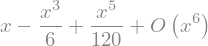

In [2]:
sin(x).series(x, 0, 6)

In [ ]:
series(cos(x), x, 0, 6)

### Exercise

The Fibonacci sequence is recursively defined by 

$$F_0 = 0,$$
$$F_1 = 1,$$
$$F_n = F_{n - 1} + F_{n - 2}.$$

The first few vales are 0, 1, 1, 2, 3, 5, 8, 13, 21, …

The Fibonacci sequence has a generating function given by $$s(x) = \frac{x}{1 - x - x^2}$$ (see http://en.wikipedia.org/wiki/Fibonacci_number#Power_series for a derivation). 

Write a function that uses series to compute the nth Fibonicci number. 

Hint: `expr.coeff(x, n)` will give the coefficient of $x^n$ in an expression. For example

In [4]:
(1 + 2*x - x**2).coeff(x, 0)

In [ ]:
(1 + 2*x - x**2).coeff(x, 1)

In [ ]:
(1 + 2*x - x**2).coeff(x, 2)

In [ ]:
# %exercise exercise_fib.py
def fib(n):
    """
    Uses series expansion and a generating function to compute the nth Fibonnicci number.

    >>> fib(0)
    0
    >>> fib(4)
    3
    >>> fib(9)
    34
    """
    gen_func = x/(1 - x - x**2) # generating function
    expansion = gen_func.???
    num = expansion.???
    return num

In [ ]:
fib(0)

In [ ]:
fib(4)

In [ ]:
fib(9)

Note: if you really want to compute Fibonacci numbers, there is a function in SymPy called `fibonicci` that can do this far more efficiently.

In [ ]:
[fibonacci(i) for i in range(10)]

`series` is nice if you want a fixed power series, but what if you don't know ahead of time how many terms you want? For that, there is the `lseries` method, which returns a generator of series terms.  This is more efficient than recomputing the whole series again if you determine you need more terms. Here is an example usage (**Warning**: since series are in general infinite, `lseries` will return an infinite generator. Here we use `zip` to limit the number of terms).

In [ ]:
[term for term, _ in zip(cos(x).lseries(x, 0), range(9))]

## Special Series

SymPy can compute special series like formal power series and fourier series. This is a new feature released in SymPy 1.0

Let's try computing formal power series of some basic functions.

In [ ]:
exp_series = fps(exp(x), x, x0=0)
exp_series

In [ ]:
exp_series.truncate(10) # Truncated version

We can easily find out any term of the expansion (no need to recompute the expansion).

In [ ]:
exp_series.term(51) # equivalent to exp_series[51]

## Fourier Series

Fourier series for functions can be computed using ``fourier_series`` function.

A sawtooth wave is defined as:
   1. $$ s(x) = x/\pi \in (-\pi, \pi) $$
   2. $$ s(x + 2k\pi) = s(x) \in (-\infty, \infty) $$
    
Let's compute the fourier series of the above defined wave.

In [ ]:
sawtooth_series = fourier_series(x / pi, (x, -pi, pi))
sawtooth_series

In [ ]:
plot(sawtooth_series.truncate(50)) 

See https://en.wikipedia.org/wiki/Gibbs_phenomenon for why the fourier series has peculiar behavior near jump discontinuties.

Just like formal power series we can index fourier series as well.

In [ ]:
sawtooth_series[51]

It is easy to shift and scale the series using ``shift`` and ``scale`` methods.

In [ ]:
sawtooth_series.shift(10).truncate(5)

In [ ]:
sawtooth_series.scale(10).truncate(5)

## Exercise

Consider a square wave defined over the range of (0, 1) as:
   1. $$ f(t) = 1 \in (0, 1/2] $$
   2. $$ f(t) = -1 \in (1/2, 1) $$
   3. $$ f(t + 1) = f(t) \in (-\infty, \infty) $$
    
Try computing the fourier series of the above defined function. Also, plot the computed fourier series.

In [ ]:
square_wave = Piecewise((1, t <= Rational(1, 2)), (-1, t > Rational(1, 2)))
square_wave

In [ ]:
square_series = fourier_series(???)
square_series

In [ ]:
plot(square_series.truncate(50))

## What next?

Try some basic operations like addition, subtraction, etc on formal power series, fourier series and see what happens. 